In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-jpg/dog_breed.jpg
/kaggle/input/cat-breed/cat_breed.jpg
/kaggle/input/petbreedmodel/pet_breed_model.pkl


In [3]:
from fastai.vision.all import *
# import gradio as gr
import timm

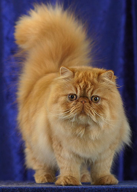

In [4]:
im = PILImage.create('/kaggle/input/cat-breed/cat_breed.jpg')
im.thumbnail((192,192))
im

In [5]:
learner = load_learner('/kaggle/input/petbreedmodel/pet_breed_model.pkl')
learner

In [6]:
learner.predict(im)

('Persian',
 tensor(7),
 tensor([7.0713e-09, 5.3901e-07, 7.3448e-07, 9.9754e-09, 1.9464e-06, 1.4188e-09,
         3.5895e-05, 9.9996e-01, 6.6131e-07, 2.3546e-10, 7.5069e-10, 7.2802e-09,
         5.0028e-09, 5.5483e-08, 1.1301e-09, 8.9205e-10, 1.7344e-08, 1.6226e-09,
         3.4236e-09, 1.6862e-09, 5.1444e-10, 4.2211e-08, 5.7401e-09, 1.2967e-07,
         5.0052e-08, 2.2343e-09, 1.4007e-08, 3.9773e-08, 1.8360e-06, 4.7968e-08,
         4.5350e-09, 5.5450e-08, 2.1826e-09, 1.0395e-09, 6.8150e-10, 1.3284e-08,
         6.2945e-07]))

In [7]:
categories = learner.dls.vocab
def classify_image(x):
    pred,_,probs=learner.predict(x)
    return dict(zip(categories,map(float,probs)))
    

In [8]:
classify_image(im)

{'Abyssinian': 7.0713079836082215e-09,
 'Bengal': 5.390100454860658e-07,
 'Birman': 7.344790446950356e-07,
 'Bombay': 9.975376080717524e-09,
 'British_Shorthair': 1.946414386111428e-06,
 'Egyptian_Mau': 1.4187681030009003e-09,
 'Maine_Coon': 3.589516563806683e-05,
 'Persian': 0.9999572038650513,
 'Ragdoll': 6.613076379835547e-07,
 'Russian_Blue': 2.354586248198842e-10,
 'Siamese': 7.50694673090635e-10,
 'Sphynx': 7.280178682123051e-09,
 'american_bulldog': 5.002835035128328e-09,
 'american_pit_bull_terrier': 5.548282899781043e-08,
 'basset_hound': 1.1301398705754195e-09,
 'beagle': 8.920486571639685e-10,
 'boxer': 1.7343543490255797e-08,
 'chihuahua': 1.6226282539832937e-09,
 'english_cocker_spaniel': 3.4236116164265695e-09,
 'english_setter': 1.6861758656006032e-09,
 'german_shorthaired': 5.144399906065189e-10,
 'great_pyrenees': 4.221104177304369e-08,
 'havanese': 5.740112385410612e-09,
 'japanese_chin': 1.296679812412549e-07,
 'keeshond': 5.005242442734925e-08,
 'leonberger': 2.2343

In [12]:
m= learner.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          